<h1> Import required Libraries </h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

<h1>Importing Dataset</h1>

In [3]:
df=pd.read_csv("Salary.csv")

In [4]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


<h1> Perform EDA </h1>

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [8]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


<h1>Visualising data</h1>

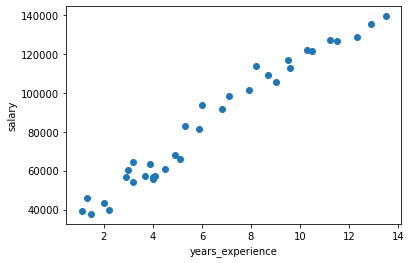

In [10]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("years_experience")
plt.ylabel("salary")
plt.show()

<h1>Prepare Data</h1>

In [20]:
X = df.iloc[:, :-1].values    # Features => Years of experience => Independent Variable
y = df.iloc[:, -1].values     # Target => Salary => Dependent Variable

X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [21]:
X.shape

(35, 1)

In [22]:
y.shape

(35,)

<h1>Split Data into train and test</h1>

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(11, 1)
(24,)
(11,)


<h1>Applying Linear Regression</h1>

In [24]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

<h1>Test Model</h1>

In [25]:
pred=lr.predict(X_test)
pred

array([120197.8256403 ,  88644.21802942,  74146.61453254, 118492.2252289 ,
        98025.02029212,  72441.01412114,  63913.01206415,  43445.80712736,
        64765.81226984, 112522.623789  , 107405.82255481])

In [26]:
y_test

array([121872,  91738,  66029, 122391, 101302,  67938,  63218,  37731,
        55794, 112635, 105582], dtype=int64)

<h1>Checking accuracy</h1>

In [27]:
r2_score=lr.score(X_test,y_test)
print(100*r2_score,'%')

97.14499470616079 %


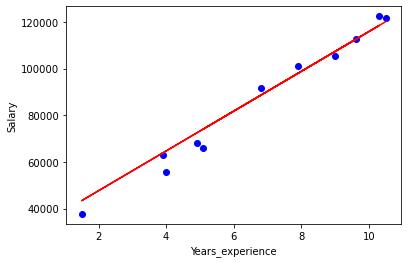

In [28]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,lr.predict(X_test),color='red')
plt.xlabel('Years_experience')
plt.ylabel('Salary')
plt.show()